In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Cotton Dataset/train'
valid_path = '/content/drive/MyDrive/Cotton Dataset/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Cotton Dataset/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy','Precision','Recall']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cotton Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',shuffle=False)

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cotton Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',shuffle=False)

Found 106 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-14-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
61/61 [==============================] - 684s 11s/step - loss: 17.5754 - accuracy: 0.5059 - precision: 0.5059 - recall: 0.5023 - val_loss: 4.2947 - val_accuracy: 0.6321 - val_precision: 0.6381 - val_recall: 0.6321
Epoch 2/20
61/61 [==============================] - 266s 4s/step - loss: 3.8158 - accuracy: 0.7355 - precision: 0.7361 - recall: 0.7350 - val_loss: 1.1475 - val_accuracy: 0.8302 - val_precision: 0.8302 - val_recall: 0.8302
Epoch 3/20
61/61 [==============================] - 271s 4s/step - loss: 4.1758 - accuracy: 0.7330 - precision: 0.7333 - recall: 0.7330 - val_loss: 1.3633 - val_accuracy: 0.8208 - val_precision: 0.8208 - val_recall: 0.8208
Epoch 4/20
61/61 [==============================] - 271s 4s/step - loss: 2.2280 - accuracy: 0.8411 - precision: 0.8419 - recall: 0.8406 - val_loss: 0.5013 - val_accuracy: 0.9151 - val_precision: 0.9151 - val_recall: 0.9151
Epoch 5/20
61/61 [==============================] - 273s 4s/step - loss: 5.0743 - accuracy: 0.7463 - preci

In [ ]:
import matplotlib.pyplot as plt

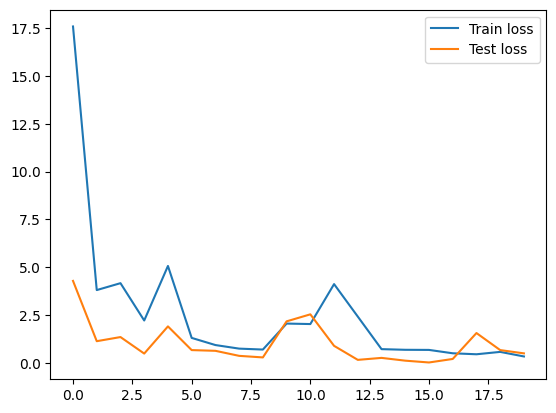

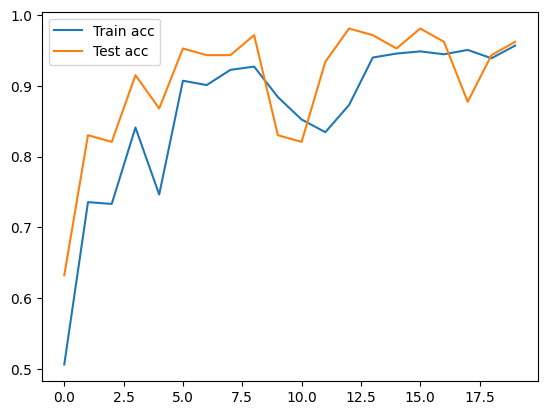

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='Train loss')
plt.plot(r.history['val_loss'], label='Test loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='Train acc')
plt.plot(r.history['val_accuracy'], label='Test acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Cotton Dataset/model_inception.h5')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_set, len(test_set) )
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['Fresh cotton plant', 'Diseased cotton plant', 'Diseased cotton leaf','Fresh cotton leaf']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

<ipython-input-19-b849c08d8424>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_set, len(test_set) )


Confusion Matrix
[[23  0  2  0]
 [ 0 28  0  0]
 [ 0  0 26  0]
 [ 1  1  0 25]]
Classification Report
                       precision    recall  f1-score   support

   Fresh cotton plant       0.96      0.92      0.94        25
Diseased cotton plant       0.97      1.00      0.98        28
 Diseased cotton leaf       0.93      1.00      0.96        26
    Fresh cotton leaf       1.00      0.93      0.96        27

             accuracy                           0.96       106
            macro avg       0.96      0.96      0.96       106
         weighted avg       0.96      0.96      0.96       106



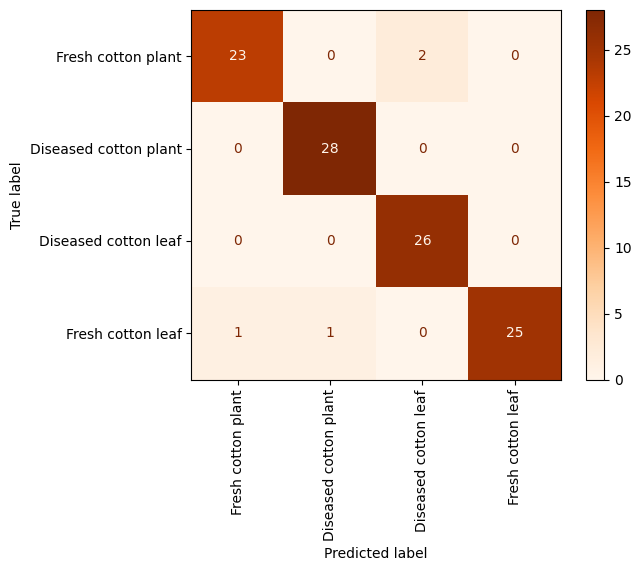

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

labels = ['Fresh cotton plant', 'Diseased cotton plant', 'Diseased cotton leaf','Fresh cotton leaf']

cm = confusion_matrix(test_set.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Oranges,xticks_rotation="vertical")
plt.show()